<a href="https://colab.research.google.com/github/RuwanPradeep0/Plant-disease-detection-model-Deep-Learning-Mini-project/blob/main/Plant%20disease%20detection_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import tensorflow as tf;
import time;

In [2]:
dataset_path = "/content/dataset"

In [20]:
BATCH_SIZE = 18;
IMAGE_SIZE = (232 , 148);

In [21]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

remaining_data = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Calculate sizes
validation_size = tf.data.experimental.cardinality(remaining_data).numpy() // 2
test_size = validation_size

validation_data = remaining_data.take(validation_size)
test_data = remaining_data.skip(validation_size)

Found 410 files belonging to 2 classes.
Using 287 files for training.
Found 410 files belonging to 2 classes.
Using 123 files for validation.


In [46]:
class_names = train_data.class_names
class_names

['Diseased', 'Healthy']

In [22]:
class_name = train_data.class_names
print(class_name)

['Diseased', 'Healthy']


In [23]:
for image_batch, label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(18, 232, 148, 3)
[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]


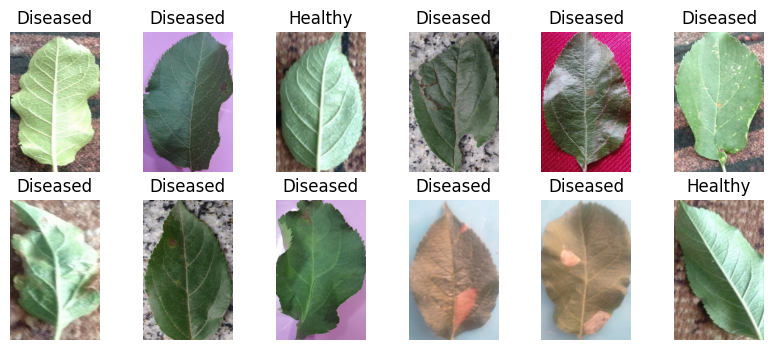

In [24]:
# plot data sample
plt.figure(figsize=(10,4))
for i in range(12):
    ax = plt.subplot(2,6,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")

In [25]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[186.       125.       202.      ]
   [186.       125.       202.      ]
   [186.       125.       202.      ]
   ...
   [196.       134.       211.      ]
   [196.       134.       211.      ]
   [196.       134.       211.      ]]

  [[186.       125.       202.      ]
   [186.       125.       202.      ]
   [186.       125.       202.      ]
   ...
   [196.       134.       211.      ]
   [196.       134.       211.      ]
   [196.       134.       211.      ]]

  [[186.       125.       202.      ]
   [186.       125.       202.      ]
   [186.       125.       202.      ]
   ...
   [196.       134.       211.      ]
   [196.       134.       211.      ]
   [196.       134.       211.      ]]

  ...

  [[177.       116.       194.      ]
   [177.       116.       194.      ]
   [175.9038   114.9038   192.77203 ]
   ...
   [195.04095  133.04095  210.04095 ]
   [195.04095  133.04095  210.04095 ]
   [195.04095  133.04095  210.04095 ]]

  [[177.       116.       194.    

**Data Augmentation**

In [26]:

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(232,148,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)


**Model Building**

In [27]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 232, 148, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 230, 146, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 115, 73, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 71, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 35, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 33, 128)      

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

**Model Training**

In [30]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=10,
                    validation_data=validation_data)

end_time = time.time()

print(f'Total time for training {(end_time-start_time):.3f} seconds')

Epoch 1/10
16/16 [==============================] - 31s 2s/step - loss: 0.4369 - accuracy: 0.8328 - val_loss: 0.7746 - val_accuracy: 0.8148
Epoch 2/10
16/16 [==============================] - 27s 2s/step - loss: 0.3254 - accuracy: 0.8502 - val_loss: 12.8031 - val_accuracy: 0.0926
Epoch 3/10
16/16 [==============================] - 30s 2s/step - loss: 0.3465 - accuracy: 0.8815 - val_loss: 2.2617 - val_accuracy: 0.8889
Epoch 4/10
16/16 [==============================] - 28s 2s/step - loss: 0.2147 - accuracy: 0.8990 - val_loss: 0.4035 - val_accuracy: 0.8333
Epoch 5/10
16/16 [==============================] - 28s 2s/step - loss: 0.2430 - accuracy: 0.8850 - val_loss: 0.2083 - val_accuracy: 0.9259
Epoch 6/10
16/16 [==============================] - 27s 2s/step - loss: 0.1960 - accuracy: 0.9094 - val_loss: 1.1459 - val_accuracy: 0.6111
Epoch 7/10
16/16 [==============================] - 29s 2s/step - loss: 0.2095 - accuracy: 0.8746 - val_loss: 0.4246 - val_accuracy: 0.8333
Epoch 8/10
16/16 [=

**Performance Analysis**

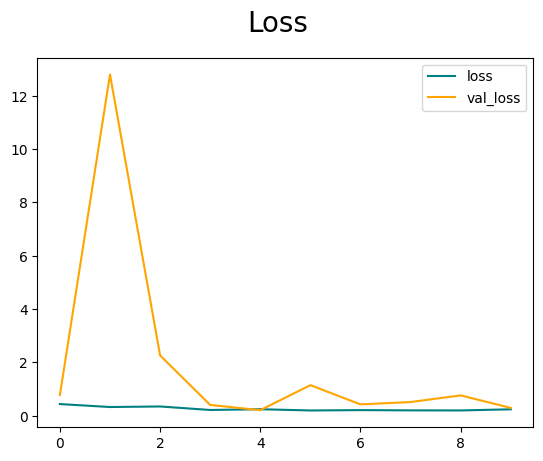

In [31]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()


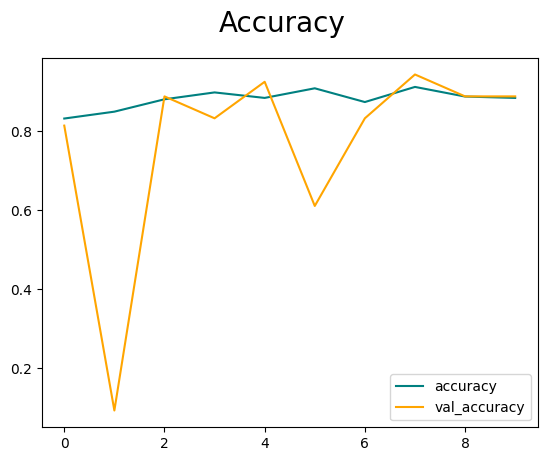

In [32]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


**Model Evaluation**

In [33]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [34]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 1s 578ms/step


In [35]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [36]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [37]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.92753625>

**Test**

In [38]:
import cv2

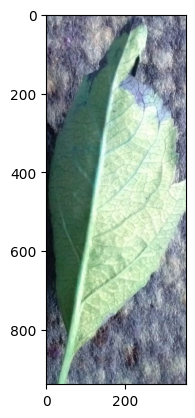

In [51]:
img = cv2.imread('/content/dataset/Diseased/1011.JPG.jpeg')
plt.imshow(img)
plt.show()


In [52]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255


In [53]:
scaled_image.shape

TensorShape([232, 148, 3])

In [54]:
np.expand_dims(scaled_image, 0).shape

(1, 232, 148, 3)

In [55]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 52ms/step


In [56]:
yhat

array([[4.8151683e-20]], dtype=float32)

In [57]:
class_names

['Diseased', 'Healthy']

In [58]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')


Diseased
